# problem statement
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

the machine learning model will be developed for prediction of the probability of whether the customer will be paying back the loan amount within 5days of loan issuance 

# loading of necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.stats import zscore

# loading the dataset

In [4]:
df=pd.read_csv('Data file.csv')

In [5]:
df.head(20)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,...,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


In [4]:
df.shape

(209593, 37)

the dataset contains 209593 data with 37 columns and out of it the label columns is the target varibale 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

in the dataset, there are no null values

In [6]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

the dataset contains mix of float64,int64 and object type data

In [7]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

# Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
list=['pdate','pcircle']
for i in list:
    df[i]=le.fit_transform(df[i])

we can drop the msisdn columns because it contains 186243 unique object values

In [11]:
df.drop(['msisdn'],axis=1,inplace=True)

# EDA

<AxesSubplot:xlabel='label', ylabel='count'>

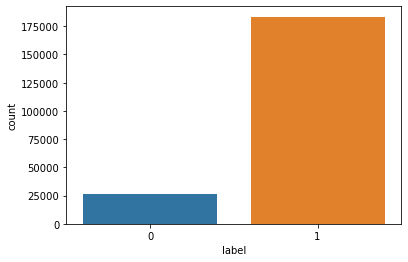

In [19]:
sns.countplot(df['label'])

it can be seen that imbalance is present in the target or the output variable

<AxesSubplot:xlabel='aon', ylabel='label'>

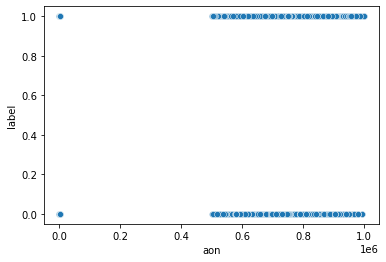

In [23]:
sns.scatterplot(x='aon',y='label',data=df)

<AxesSubplot:xlabel='aon', ylabel='Density'>

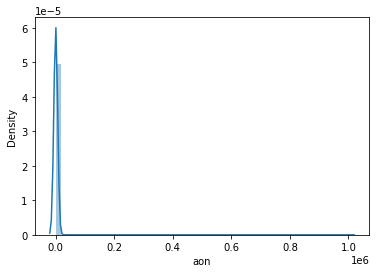

In [27]:
sns.distplot(df["aon"])

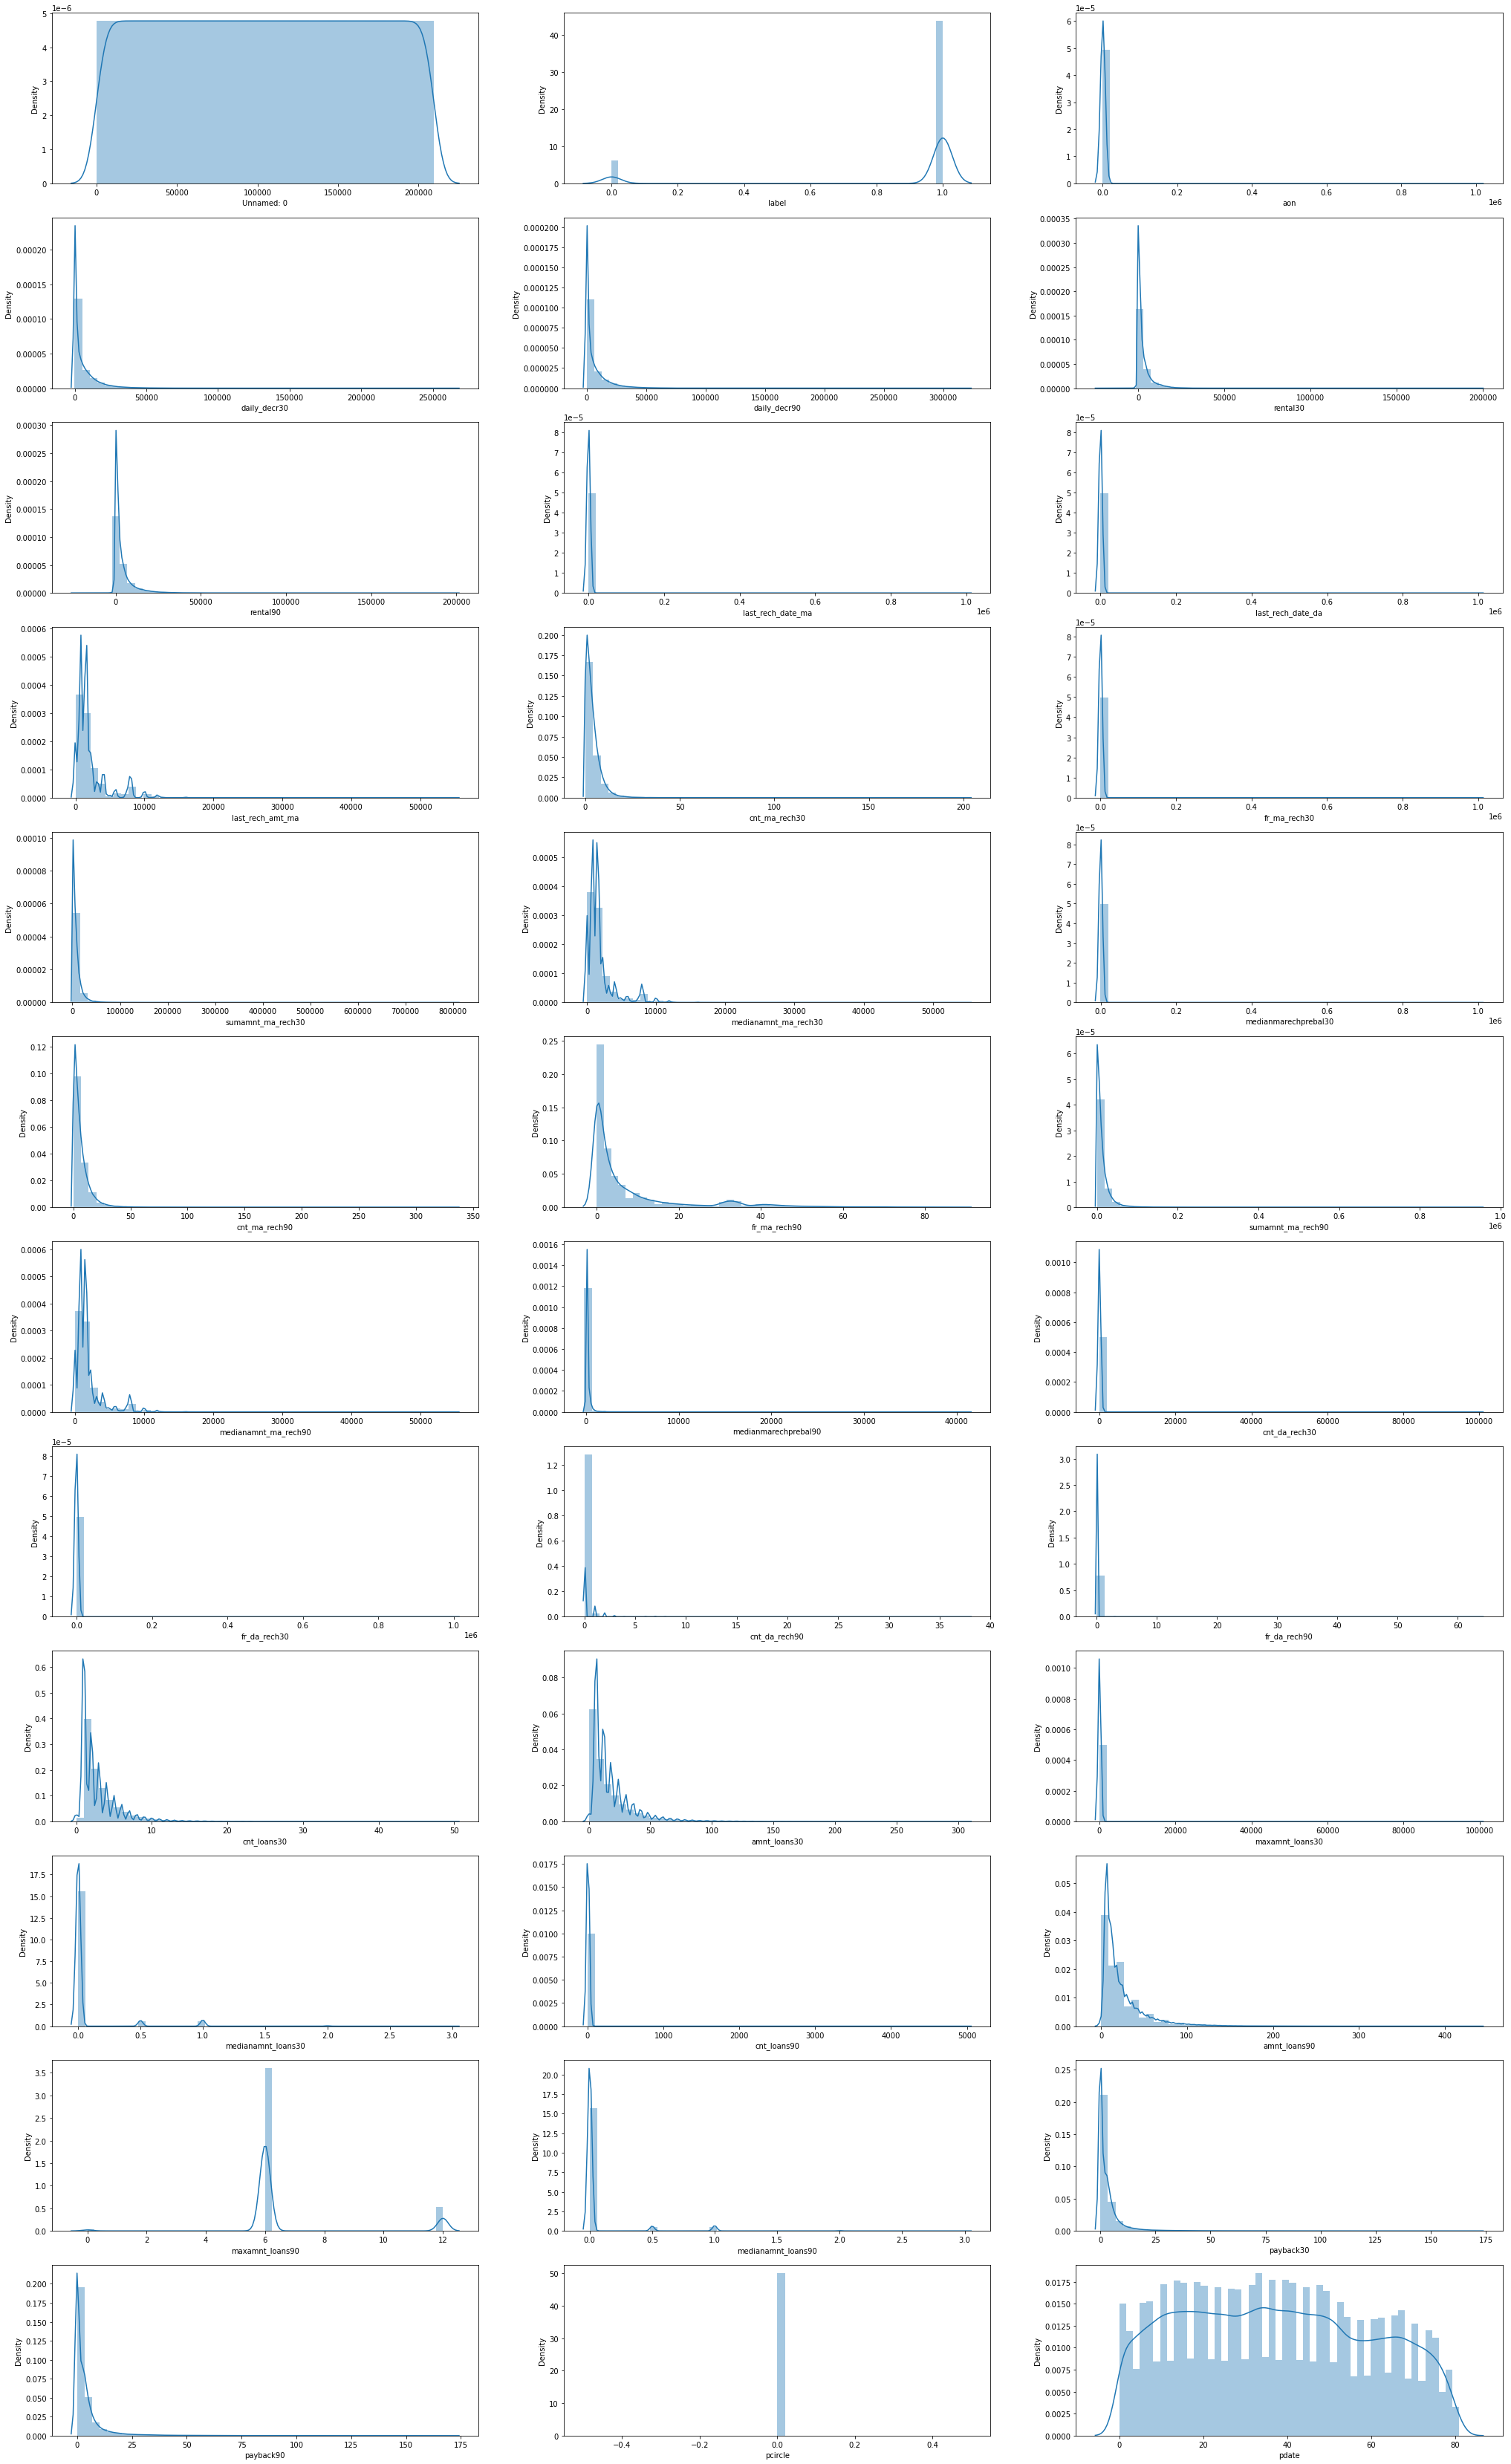

In [30]:
plt.figure(figsize=(35,60))
count =1
for column in df:
    if count <= 36:
        ax = plt.subplot(12,3,count)
        sns.distplot(df[column])
        plt.xlabel(column) 
    count+=1
plt.show()

distribution of all the columns have been presented

it can be observed that some of the graphs are not normally distributed and have skewness present in them

<AxesSubplot:xlabel='label', ylabel='maxamnt_loans90'>

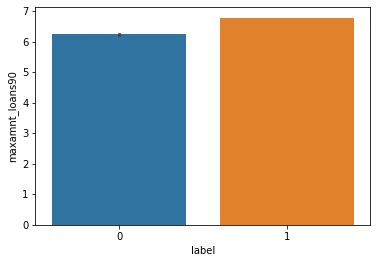

In [36]:
sns.barplot(x=df['label'],y=df['maxamnt_loans90'])

defaulters are nearly equal for maximum amount of loan taken by the user in last 90 days

<AxesSubplot:xlabel='label', ylabel='medianamnt_loans30'>

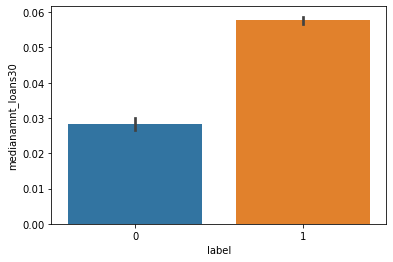

In [37]:
sns.barplot(x=df['label'],y=df['medianamnt_loans30'])

numbers of defaulters are more for Median of amounts of loan taken by the user in last 30 days

<AxesSubplot:xlabel='label', ylabel='medianamnt_loans90'>

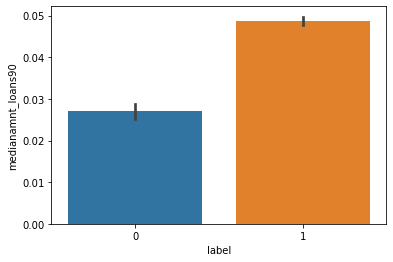

In [38]:
sns.barplot(x=df['label'],y=df['medianamnt_loans90'])

numbers of defaulters are more for Median of amounts of loan taken by the user in last 90 days

<AxesSubplot:xlabel='label', ylabel='fr_ma_rech30'>

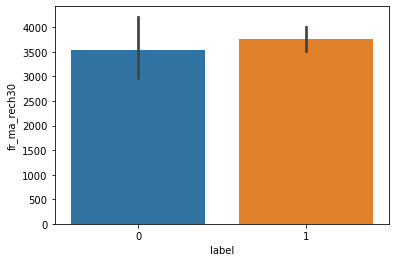

In [41]:
sns.barplot(x=df['label'],y=df['fr_ma_rech30'])

<AxesSubplot:xlabel='label', ylabel='aon'>

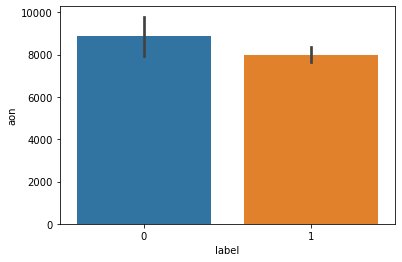

In [42]:
sns.barplot(x=df['label'],y=df['aon'])

defaulters and non defaulters are nearly equal for all age on cellular network

<AxesSubplot:xlabel='label', ylabel='daily_decr30'>

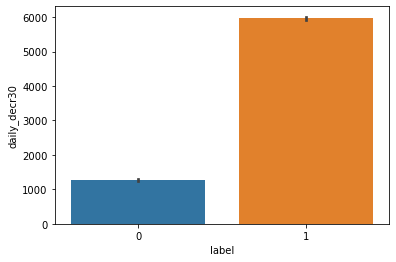

In [43]:
sns.barplot(x=df['label'],y=df['daily_decr30'])

as the daily spent from main account incrases within last 30 days defaulters increases

<AxesSubplot:xlabel='label', ylabel='daily_decr90'>

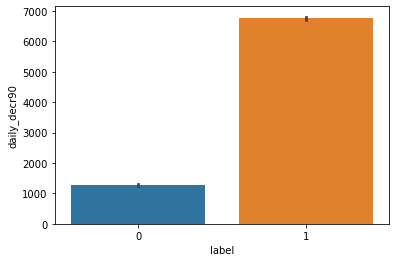

In [44]:
sns.barplot(x=df['label'],y=df['daily_decr90'])

as the daily spent from main account incrases within last 90 days defaulters increases

<AxesSubplot:xlabel='label', ylabel='rental30'>

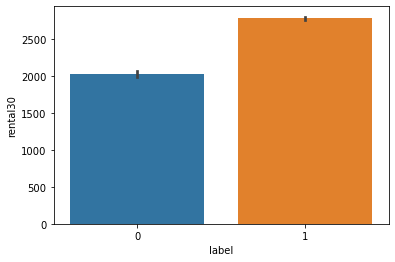

In [45]:
sns.barplot(x=df['label'],y=df['rental30'])

number of defaulters tend to incraese when the average main balance account over last 30 days incraeses 2000

<AxesSubplot:xlabel='label', ylabel='rental90'>

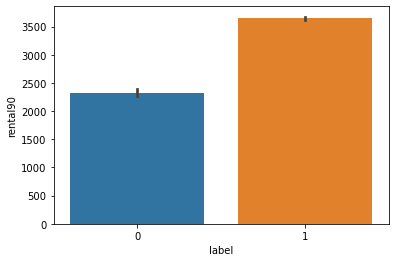

In [46]:
sns.barplot(x=df['label'],y=df['rental90'])

number of defaulters tend to incraese when the average main balance account over last 30 days incraeses 2300

<AxesSubplot:xlabel='label', ylabel='last_rech_date_ma'>

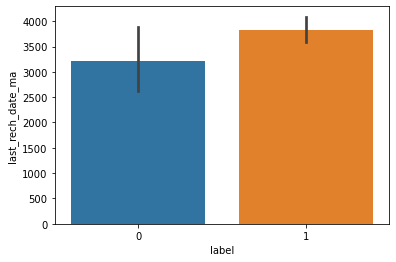

In [47]:
sns.barplot(x=df['label'],y=df['last_rech_date_ma'])

number of defaulters tend to is more when the number of days till last recharge of main account incraeses over  2200

<AxesSubplot:xlabel='label', ylabel='last_rech_date_da'>

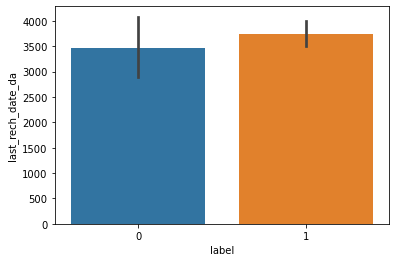

In [48]:
sns.barplot(x=df['label'],y=df['last_rech_date_da'])

number of defaulters tend to remian same when the number of days till last recharge of data account 

<AxesSubplot:xlabel='label', ylabel='fr_ma_rech90'>

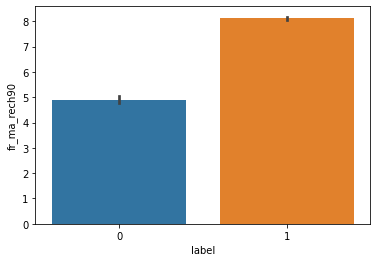

In [49]:
sns.barplot(x=df['label'],y=df['fr_ma_rech90'])

defaulters are more when Frequency of main account recharged in last 30 days is more than 5

<AxesSubplot:xlabel='label', ylabel='sumamnt_ma_rech90'>

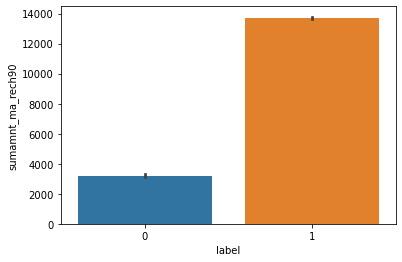

In [50]:
sns.barplot(x=df['label'],y=df['sumamnt_ma_rech90'])

defaulters are more when Total amount of recharge in main account over last 90 days is more than 3500

<AxesSubplot:xlabel='label', ylabel='cnt_da_rech30'>

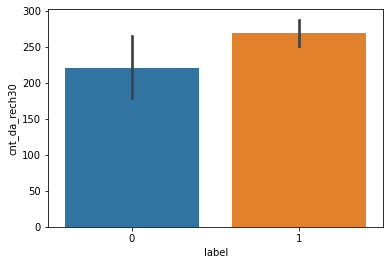

In [51]:
sns.barplot(x=df['label'],y=df['cnt_da_rech30'])

defaulters are more Number of times data account got recharged in last 30 days is more than 220

<AxesSubplot:xlabel='label', ylabel='fr_da_rech30'>

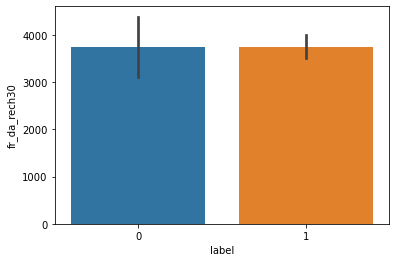

In [52]:
sns.barplot(x=df['label'],y=df['fr_da_rech30'])

defaulters and non defaulters are same for Frequency of data account recharged in last 30 days

<AxesSubplot:xlabel='label', ylabel='cnt_loans30'>

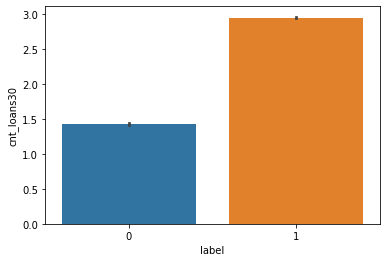

In [53]:
sns.barplot(x=df['label'],y=df['cnt_loans30'])

defaulters are more when Number of loans taken by user in last 90 days is more than 1.5

<AxesSubplot:xlabel='label', ylabel='amnt_loans90'>

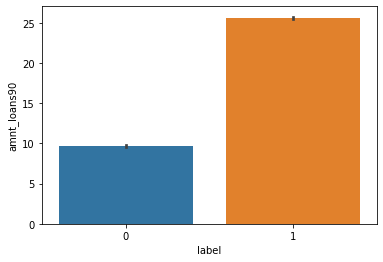

In [55]:
sns.barplot(x=df['label'],y=df['amnt_loans90'])

defaulters are more when total amount of loans taken by user in last 90 days is more than 10

# boxplot to check for outliers

Unnamed: 0                 AxesSubplot(0.125,0.657941;0.0545775x0.222059)
label                   AxesSubplot(0.190493,0.657941;0.0545775x0.222059)
aon                     AxesSubplot(0.255986,0.657941;0.0545775x0.222059)
daily_decr30            AxesSubplot(0.321479,0.657941;0.0545775x0.222059)
daily_decr90            AxesSubplot(0.386972,0.657941;0.0545775x0.222059)
rental30                AxesSubplot(0.452465,0.657941;0.0545775x0.222059)
rental90                AxesSubplot(0.517958,0.657941;0.0545775x0.222059)
last_rech_date_ma       AxesSubplot(0.583451,0.657941;0.0545775x0.222059)
last_rech_date_da       AxesSubplot(0.648944,0.657941;0.0545775x0.222059)
last_rech_amt_ma        AxesSubplot(0.714437,0.657941;0.0545775x0.222059)
cnt_ma_rech30            AxesSubplot(0.77993,0.657941;0.0545775x0.222059)
fr_ma_rech30            AxesSubplot(0.845423,0.657941;0.0545775x0.222059)
sumamnt_ma_rech30          AxesSubplot(0.125,0.391471;0.0545775x0.222059)
medianamnt_ma_rech30    AxesSubplot(0.

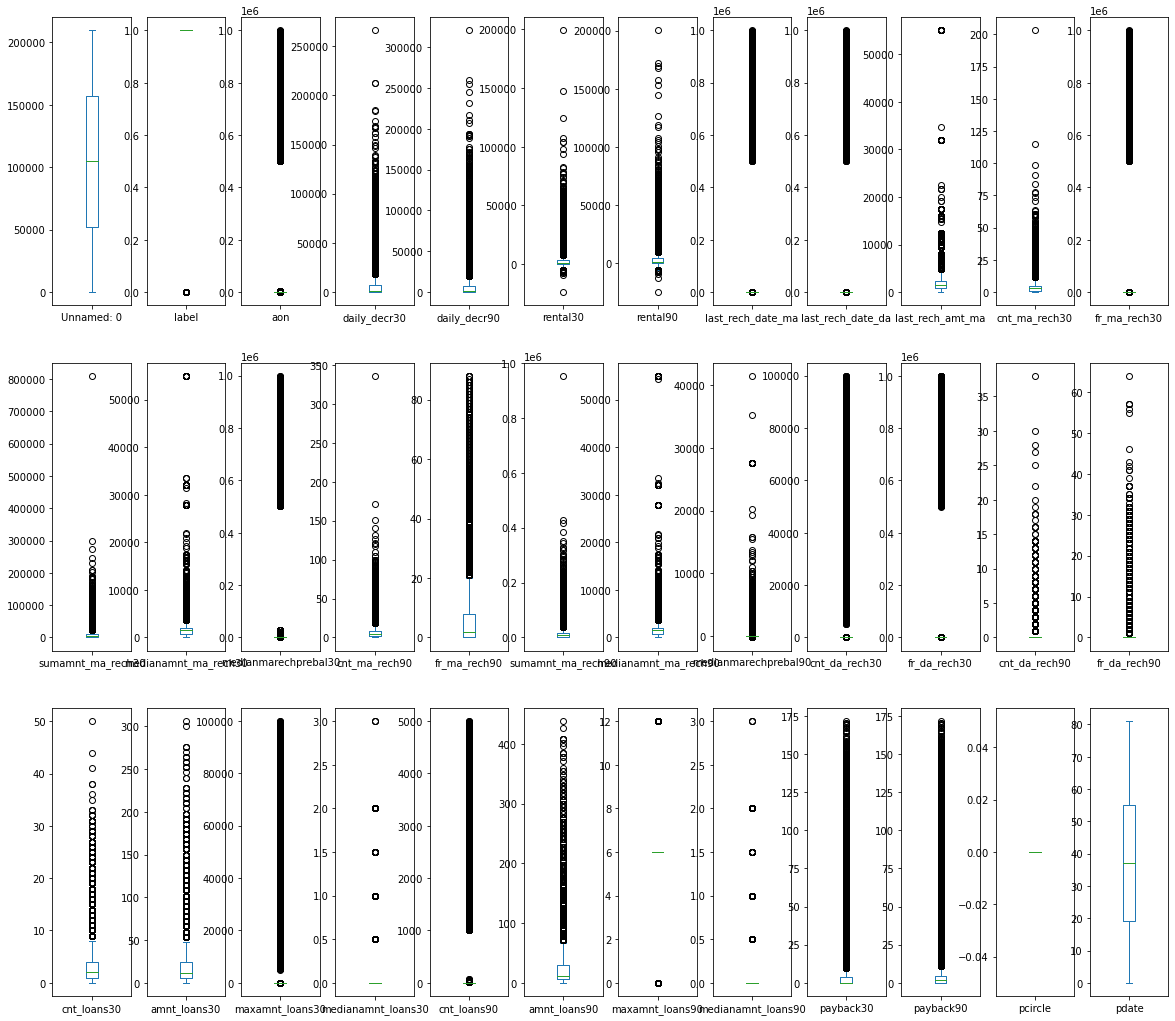

In [56]:
df.plot(kind='box',subplots=True,layout=(3,12),figsize=(20,18))

it can be observed that large number of outliers are present in multiple columns

# descriptive statistics

In [57]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,0.0,37.512646
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.0,21.989630
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.0,19.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,0.0,37.000000
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,0.0,55.000000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,0.0,81.000000


outliers are present

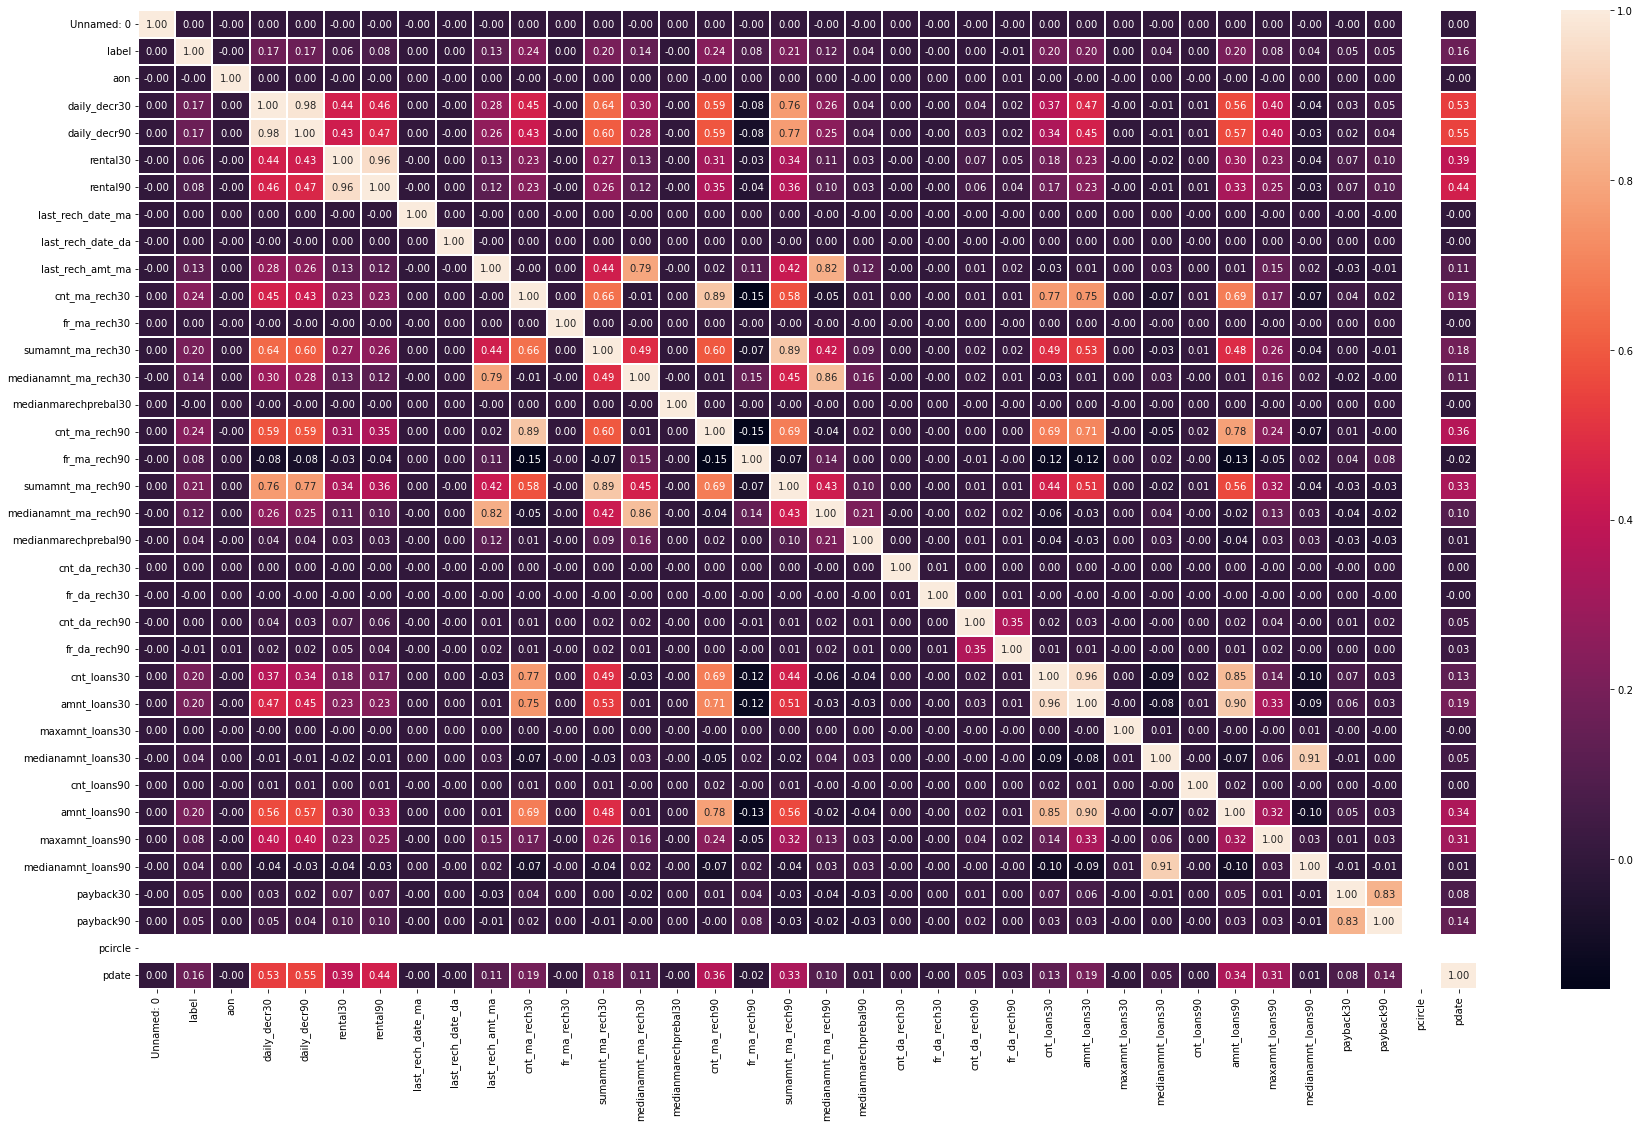

In [58]:
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

In [59]:
df.corr()["label"].sort_values()

fr_da_rech90           -0.005418
medianmarechprebal30   -0.004829
aon                    -0.003785
fr_da_rech30           -0.000027
maxamnt_loans30         0.000248
Unnamed: 0              0.000403
fr_ma_rech30            0.001330
last_rech_date_da       0.001711
cnt_da_rech90           0.002999
last_rech_date_ma       0.003728
cnt_da_rech30           0.003827
cnt_loans90             0.004733
medianamnt_loans90      0.035747
medianmarechprebal90    0.039300
medianamnt_loans30      0.044589
payback30               0.048336
payback90               0.049183
rental30                0.058085
rental90                0.075521
maxamnt_loans90         0.084144
fr_ma_rech90            0.084385
medianamnt_ma_rech90    0.120855
last_rech_amt_ma        0.131804
medianamnt_ma_rech30    0.141490
pdate                   0.162687
daily_decr90            0.166150
daily_decr30            0.168298
cnt_loans30             0.196283
amnt_loans30            0.197272
amnt_loans90            0.199788
sumamnt_ma

we can drop columns fr_da_rech30,pcircle and Unnamed: 0  because they have very less correlation

In [61]:
df.drop(['fr_da_rech30','pcircle','Unnamed: 0'],axis=1,inplace=True)

# check for vif

In [62]:
# importing libraries to calculate the variance inflation factor, which may result in low accuracy
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["Variables"]=x1.columns
    vif["VIF factor"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return (vif)

In [64]:
x=df.drop(["label"],axis=1)
y=df["label"]

In [65]:
calc_vif(x)

,Variables,VIF factor
0,aon,1.011082
1,daily_decr30,39.372544
2,daily_decr90,41.892223
3,rental30,18.375719
4,rental90,19.203750
5,last_rech_date_ma,1.004761
6,last_rech_date_da,1.004786
7,last_rech_amt_ma,6.029184
8,cnt_ma_rech30,28.121329
9,fr_ma_rech30,1.004700


some columns have multicollinearity so we can daily_decr90 and amnt_loans30 to improve accuracy of model

In [66]:
df.drop(['daily_decr90', 'amnt_loans30'],axis=1,inplace=True)

# removal of outliers

In [67]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [68]:
np.where(z>3)

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64),
 array([14, 14, 29, ..., 25, 23, 27], dtype=int64))

In [69]:
dfnew=df[(z<3).all(axis=1)]

In [70]:
dfnew.shape

(162797, 31)

In [71]:
df.shape

(209593, 31)

the data loss is very large close to 22 % so we can loose such large amount of data

In [107]:
dfnew=df[(z<6).all(axis=1)]

In [108]:
dfnew.shape

(195036, 31)

data loss is 6.9%

# smote

In [109]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [110]:
x=dfnew.drop(["label"],axis=1)
y=dfnew["label"]

In [111]:
trainx,trainy=smt.fit_resample(x,y)

In [112]:
trainx.shape

(340996, 30)

In [113]:
trainy.value_counts()

0    170498
1    170498
Name: label, dtype: int64

# skewness removal

In [120]:
trainx.skew().sort_values()

pdate                    0.354686
aon                      1.047928
cnt_ma_rech30            2.263814
fr_ma_rech30             2.264527
maxamnt_loans90          2.398706
last_rech_amt_ma         2.455069
cnt_ma_rech90            2.504673
fr_ma_rech90             2.518793
medianamnt_ma_rech90     2.592626
medianamnt_ma_rech30     2.635815
cnt_loans30              2.736429
sumamnt_ma_rech30        2.779754
rental30                 2.798830
last_rech_date_ma        2.919108
rental90                 2.943448
sumamnt_ma_rech90        2.951258
amnt_loans90             3.053949
daily_decr30             3.244151
payback90                3.856628
payback30                4.254788
medianamnt_loans30       4.574306
medianamnt_loans90       4.893470
medianmarechprebal90     6.198303
cnt_da_rech90            9.729288
last_rech_date_da       11.673789
medianmarechprebal30    12.007947
maxamnt_loans30         34.943932
cnt_da_rech30           34.965677
cnt_loans90             52.959317
fr_da_rech90  

In [92]:
list=['pdate',           
'cnt_ma_rech30',            
'fr_ma_rech30',            
'maxamnt_loans90',          
'last_rech_amt_ma',         
'cnt_ma_rech90',            
'fr_ma_rech90',             
'medianamnt_ma_rech90',    
'medianamnt_ma_rech30',     
'cnt_loans30',              
'sumamnt_ma_rech30',        
'rental30',               
'rental90',                
'sumamnt_ma_rech90',        
'amnt_loans90',             
'payback90',                
'payback30',               
'medianamnt_loans30',       
'medianamnt_loans90',       
'cnt_da_rech90',           
'medianmarechprebal30',    
'maxamnt_loans30',         
'cnt_da_rech30',           
'cnt_loans90',             
'fr_da_rech90']
for i in list:
    if trainx.skew().loc[i]>0.5:
        trainx[i]=np.log1p(trainx[i])

In [93]:
trainx.skew().sort_values()

maxamnt_loans90         -2.489336
medianamnt_ma_rech90    -1.262825
last_rech_amt_ma        -1.246619
rental30                -1.167281
rental90                -1.151448
sumamnt_ma_rech90       -1.128183
medianamnt_ma_rech30    -0.975947
sumamnt_ma_rech30       -0.902800
medianmarechprebal30    -0.174674
cnt_ma_rech90            0.307630
cnt_ma_rech30            0.322293
pdate                    0.354350
fr_ma_rech30             0.777345
fr_ma_rech90             0.791327
amnt_loans90             0.810306
aon                      1.047564
payback90                1.048629
payback30                1.214251
cnt_loans30              1.285359
cnt_loans90              1.572621
last_rech_date_ma        2.922964
daily_decr30             3.246769
medianamnt_loans30       4.325073
medianamnt_loans90       4.619151
medianmarechprebal90     6.234110
cnt_da_rech90            9.053214
maxamnt_loans30          9.403276
last_rech_date_da       11.627966
cnt_da_rech30           29.705617
fr_da_rech90  

skewness has been adjusted to some extent

# application of machine learning models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [117]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((accuracy_score(y_test,pred_test))>maxacc):
            maxacc=accuracy_score(y_test,pred_test)
            rs=i
        print(f"at random state {i},  accuracy score is {accuracy_score(y_test,pred_test)}")
        print(f"at random state {i}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
        print(f"at random state {i}, classification report is {classification_report(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)
   

# Kneighbors Classifier

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
model_selection(knn)

at random state 0,  accuracy score is 0.8539672919578881
at random state 0, confusion matrix is [[50012   871]
 [14068 37348]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.78      0.98      0.87     50883
           1       0.98      0.73      0.83     51416

    accuracy                           0.85    102299
   macro avg       0.88      0.85      0.85    102299
weighted avg       0.88      0.85      0.85    102299



at random state 1,  accuracy score is 0.8527160578304773
at random state 1, confusion matrix is [[50054   948]
 [14119 37178]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.78      0.98      0.87     51002
           1       0.98      0.72      0.83     51297

    accuracy                           0.85    102299
   macro avg       0.88      0.85      0.85    102299
weighted avg       0.88      0.85      0.85    102299





at random state 17,  accuracy score is 0.8547493132875199
at random state 17, confusion matrix is [[50169   905]
 [13954 37271]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.78      0.98      0.87     51074
           1       0.98      0.73      0.83     51225

    accuracy                           0.85    102299
   macro avg       0.88      0.85      0.85    102299
weighted avg       0.88      0.85      0.85    102299



at random state 18,  accuracy score is 0.8560005474149307
at random state 18, confusion matrix is [[50204   942]
 [13789 37364]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.78      0.98      0.87     51146
           1       0.98      0.73      0.84     51153

    accuracy                           0.86    102299
   macro avg       0.88      0.86      0.85    102299
weighted avg       0.88      0.86      0.85    1022

at random state 34,  accuracy score is 0.8537522360922394
at random state 34, confusion matrix is [[50122   917]
 [14044 37216]]
at random state 34, classification report is               precision    recall  f1-score   support

           0       0.78      0.98      0.87     51039
           1       0.98      0.73      0.83     51260

    accuracy                           0.85    102299
   macro avg       0.88      0.85      0.85    102299
weighted avg       0.88      0.85      0.85    102299



at random state 35,  accuracy score is 0.8534785286268683
at random state 35, confusion matrix is [[50464   954]
 [14035 36846]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.78      0.98      0.87     51418
           1       0.97      0.72      0.83     50881

    accuracy                           0.85    102299
   macro avg       0.88      0.85      0.85    102299
weighted avg       0.88      0.85      0.85    1022

at random state 51,  accuracy score is 0.8552674024184009
at random state 51, confusion matrix is [[50175   936]
 [13870 37318]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.78      0.98      0.87     51111
           1       0.98      0.73      0.83     51188

    accuracy                           0.86    102299
   macro avg       0.88      0.86      0.85    102299
weighted avg       0.88      0.86      0.85    102299



at random state 52,  accuracy score is 0.8551794250188174
at random state 52, confusion matrix is [[50215   918]
 [13897 37269]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.78      0.98      0.87     51133
           1       0.98      0.73      0.83     51166

    accuracy                           0.86    102299
   macro avg       0.88      0.86      0.85    102299
weighted avg       0.88      0.86      0.85    1022

at random state 68,  accuracy score is 0.8535665060264519
at random state 68, confusion matrix is [[49915   998]
 [13982 37404]]
at random state 68, classification report is               precision    recall  f1-score   support

           0       0.78      0.98      0.87     50913
           1       0.97      0.73      0.83     51386

    accuracy                           0.85    102299
   macro avg       0.88      0.85      0.85    102299
weighted avg       0.88      0.85      0.85    102299



at random state 69,  accuracy score is 0.8547981896206219
at random state 69, confusion matrix is [[50282   970]
 [13884 37163]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.78      0.98      0.87     51252
           1       0.97      0.73      0.83     51047

    accuracy                           0.85    102299
   macro avg       0.88      0.85      0.85    102299
weighted avg       0.88      0.85      0.85    1022

at random state 85,  accuracy score is 0.8543680778893245
at random state 85, confusion matrix is [[50270   980]
 [13918 37131]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.78      0.98      0.87     51250
           1       0.97      0.73      0.83     51049

    accuracy                           0.85    102299
   macro avg       0.88      0.85      0.85    102299
weighted avg       0.88      0.85      0.85    102299



at random state 86,  accuracy score is 0.8560689742812735
at random state 86, confusion matrix is [[50259   971]
 [13753 37316]]
at random state 86, classification report is               precision    recall  f1-score   support

           0       0.79      0.98      0.87     51230
           1       0.97      0.73      0.84     51069

    accuracy                           0.86    102299
   macro avg       0.88      0.86      0.85    102299
weighted avg       0.88      0.86      0.85    1022

CV score

In [127]:
score=cross_val_score(knn,trainx,trainy,cv=6)
print(score)
print(score.mean())
print(score.std())

[0.86245667 0.86317808 0.86228072 0.86222793 0.86248944 0.86352759]
0.8626934058763766
0.00048569512269023906


# Decision tree classifier

In [118]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model_selection(dtc)

at random state 0,  accuracy score is 0.9114067586193414
at random state 0, confusion matrix is [[46694  4189]
 [ 4874 46542]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.91      0.92      0.91     50883
           1       0.92      0.91      0.91     51416

    accuracy                           0.91    102299
   macro avg       0.91      0.91      0.91    102299
weighted avg       0.91      0.91      0.91    102299



at random state 1,  accuracy score is 0.9085035044330834
at random state 1, confusion matrix is [[46678  4324]
 [ 5036 46261]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.90      0.92      0.91     51002
           1       0.91      0.90      0.91     51297

    accuracy                           0.91    102299
   macro avg       0.91      0.91      0.91    102299
weighted avg       0.91      0.91      0.91    102299





at random state 17,  accuracy score is 0.9088358634981769
at random state 17, confusion matrix is [[46754  4320]
 [ 5006 46219]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.90      0.92      0.91     51074
           1       0.91      0.90      0.91     51225

    accuracy                           0.91    102299
   macro avg       0.91      0.91      0.91    102299
weighted avg       0.91      0.91      0.91    102299



at random state 18,  accuracy score is 0.9104781082904037
at random state 18, confusion matrix is [[46740  4406]
 [ 4752 46401]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.91      0.91      0.91     51146
           1       0.91      0.91      0.91     51153

    accuracy                           0.91    102299
   macro avg       0.91      0.91      0.91    102299
weighted avg       0.91      0.91      0.91    1022

at random state 34,  accuracy score is 0.9095201321616047
at random state 34, confusion matrix is [[46789  4250]
 [ 5006 46254]]
at random state 34, classification report is               precision    recall  f1-score   support

           0       0.90      0.92      0.91     51039
           1       0.92      0.90      0.91     51260

    accuracy                           0.91    102299
   macro avg       0.91      0.91      0.91    102299
weighted avg       0.91      0.91      0.91    102299



at random state 35,  accuracy score is 0.9112601296200354
at random state 35, confusion matrix is [[47201  4217]
 [ 4861 46020]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.91      0.92      0.91     51418
           1       0.92      0.90      0.91     50881

    accuracy                           0.91    102299
   macro avg       0.91      0.91      0.91    102299
weighted avg       0.91      0.91      0.91    1022

at random state 51,  accuracy score is 0.9077214831034517
at random state 51, confusion matrix is [[46810  4301]
 [ 5139 46049]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.90      0.92      0.91     51111
           1       0.91      0.90      0.91     51188

    accuracy                           0.91    102299
   macro avg       0.91      0.91      0.91    102299
weighted avg       0.91      0.91      0.91    102299



at random state 52,  accuracy score is 0.90940282896216
at random state 52, confusion matrix is [[46890  4243]
 [ 5025 46141]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.90      0.92      0.91     51133
           1       0.92      0.90      0.91     51166

    accuracy                           0.91    102299
   macro avg       0.91      0.91      0.91    102299
weighted avg       0.91      0.91      0.91    102299

at random state 68,  accuracy score is 0.9095005816283639
at random state 68, confusion matrix is [[46649  4264]
 [ 4994 46392]]
at random state 68, classification report is               precision    recall  f1-score   support

           0       0.90      0.92      0.91     50913
           1       0.92      0.90      0.91     51386

    accuracy                           0.91    102299
   macro avg       0.91      0.91      0.91    102299
weighted avg       0.91      0.91      0.91    102299



at random state 69,  accuracy score is 0.9101946255584121
at random state 69, confusion matrix is [[47100  4152]
 [ 5035 46012]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.90      0.92      0.91     51252
           1       0.92      0.90      0.91     51047

    accuracy                           0.91    102299
   macro avg       0.91      0.91      0.91    102299
weighted avg       0.91      0.91      0.91    1022

at random state 85,  accuracy score is 0.9107615910223952
at random state 85, confusion matrix is [[47044  4206]
 [ 4923 46126]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.91      0.92      0.91     51250
           1       0.92      0.90      0.91     51049

    accuracy                           0.91    102299
   macro avg       0.91      0.91      0.91    102299
weighted avg       0.91      0.91      0.91    102299



at random state 86,  accuracy score is 0.9096374353610495
at random state 86, confusion matrix is [[46990  4240]
 [ 5004 46065]]
at random state 86, classification report is               precision    recall  f1-score   support

           0       0.90      0.92      0.91     51230
           1       0.92      0.90      0.91     51069

    accuracy                           0.91    102299
   macro avg       0.91      0.91      0.91    102299
weighted avg       0.91      0.91      0.91    1022

CV score

In [119]:
score=cross_val_score(dtc,trainx,trainy,cv=6)
print(score)
print(score.mean())
print(score.std())

[0.8044622  0.92780603 0.9271374  0.92960076 0.92741765 0.92864935]
0.90751223193979
0.04609266397293234


# Random forest classifier

In [124]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_selection(rf)

at random state 0,  accuracy score is 0.9480151321127284
at random state 0, confusion matrix is [[48033  2850]
 [ 2468 48948]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.95      0.94      0.95     50883
           1       0.94      0.95      0.95     51416

    accuracy                           0.95    102299
   macro avg       0.95      0.95      0.95    102299
weighted avg       0.95      0.95      0.95    102299



at random state 1,  accuracy score is 0.9470571559839295
at random state 1, confusion matrix is [[48114  2888]
 [ 2528 48769]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.95      0.94      0.95     51002
           1       0.94      0.95      0.95     51297

    accuracy                           0.95    102299
   macro avg       0.95      0.95      0.95    102299
weighted avg       0.95      0.95      0.95    102299





at random state 17,  accuracy score is 0.9483083901113403
at random state 17, confusion matrix is [[48312  2762]
 [ 2526 48699]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.95      0.95      0.95     51074
           1       0.95      0.95      0.95     51225

    accuracy                           0.95    102299
   macro avg       0.95      0.95      0.95    102299
weighted avg       0.95      0.95      0.95    102299



at random state 18,  accuracy score is 0.9486602997096746
at random state 18, confusion matrix is [[48334  2812]
 [ 2440 48713]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.95      0.95      0.95     51146
           1       0.95      0.95      0.95     51153

    accuracy                           0.95    102299
   macro avg       0.95      0.95      0.95    102299
weighted avg       0.95      0.95      0.95    1022

at random state 34,  accuracy score is 0.94928591677338
at random state 34, confusion matrix is [[48381  2658]
 [ 2530 48730]]
at random state 34, classification report is               precision    recall  f1-score   support

           0       0.95      0.95      0.95     51039
           1       0.95      0.95      0.95     51260

    accuracy                           0.95    102299
   macro avg       0.95      0.95      0.95    102299
weighted avg       0.95      0.95      0.95    102299



at random state 35,  accuracy score is 0.9486407491764338
at random state 35, confusion matrix is [[48613  2805]
 [ 2449 48432]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.95      0.95      0.95     51418
           1       0.95      0.95      0.95     50881

    accuracy                           0.95    102299
   macro avg       0.95      0.95      0.95    102299
weighted avg       0.95      0.95      0.95    102299

at random state 51,  accuracy score is 0.9486994007761562
at random state 51, confusion matrix is [[48419  2692]
 [ 2556 48632]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.95      0.95      0.95     51111
           1       0.95      0.95      0.95     51188

    accuracy                           0.95    102299
   macro avg       0.95      0.95      0.95    102299
weighted avg       0.95      0.95      0.95    102299



at random state 52,  accuracy score is 0.9473015376494394
at random state 52, confusion matrix is [[48291  2842]
 [ 2549 48617]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.95      0.94      0.95     51133
           1       0.94      0.95      0.95     51166

    accuracy                           0.95    102299
   macro avg       0.95      0.95      0.95    102299
weighted avg       0.95      0.95      0.95    1022

at random state 68,  accuracy score is 0.9480933342456915
at random state 68, confusion matrix is [[48155  2758]
 [ 2552 48834]]
at random state 68, classification report is               precision    recall  f1-score   support

           0       0.95      0.95      0.95     50913
           1       0.95      0.95      0.95     51386

    accuracy                           0.95    102299
   macro avg       0.95      0.95      0.95    102299
weighted avg       0.95      0.95      0.95    102299



at random state 69,  accuracy score is 0.9487971534423602
at random state 69, confusion matrix is [[48566  2686]
 [ 2552 48495]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.95      0.95      0.95     51252
           1       0.95      0.95      0.95     51047

    accuracy                           0.95    102299
   macro avg       0.95      0.95      0.95    102299
weighted avg       0.95      0.95      0.95    1022

at random state 85,  accuracy score is 0.9488069287089805
at random state 85, confusion matrix is [[48497  2753]
 [ 2484 48565]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.95      0.95      0.95     51250
           1       0.95      0.95      0.95     51049

    accuracy                           0.95    102299
   macro avg       0.95      0.95      0.95    102299
weighted avg       0.95      0.95      0.95    102299



at random state 86,  accuracy score is 0.9484061427775442
at random state 86, confusion matrix is [[48502  2728]
 [ 2550 48519]]
at random state 86, classification report is               precision    recall  f1-score   support

           0       0.95      0.95      0.95     51230
           1       0.95      0.95      0.95     51069

    accuracy                           0.95    102299
   macro avg       0.95      0.95      0.95    102299
weighted avg       0.95      0.95      0.95    1022

CV score

In [128]:
score=cross_val_score(rf,trainx,trainy,cv=6)
print(score)
print(score.mean())
print(score.std())

[0.83303714 0.9677828  0.96883853 0.96773002 0.96767666 0.96809896]
0.9455273514085692
0.050308697805566474


# logistic regression

In [121]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
model_selection(lg)

at random state 0,  accuracy score is 0.7602322603349007
at random state 0, confusion matrix is [[41666  9217]
 [15311 36105]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.73      0.82      0.77     50883
           1       0.80      0.70      0.75     51416

    accuracy                           0.76    102299
   macro avg       0.76      0.76      0.76    102299
weighted avg       0.76      0.76      0.76    102299



at random state 1,  accuracy score is 0.7608383268653652
at random state 1, confusion matrix is [[41549  9453]
 [15013 36284]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.73      0.81      0.77     51002
           1       0.79      0.71      0.75     51297

    accuracy                           0.76    102299
   macro avg       0.76      0.76      0.76    102299
weighted avg       0.76      0.76      0.76    102299





at random state 17,  accuracy score is 0.7598510249367052
at random state 17, confusion matrix is [[41541  9533]
 [15034 36191]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.73      0.81      0.77     51074
           1       0.79      0.71      0.75     51225

    accuracy                           0.76    102299
   macro avg       0.76      0.76      0.76    102299
weighted avg       0.76      0.76      0.76    102299



at random state 18,  accuracy score is 0.7599096765364275
at random state 18, confusion matrix is [[41540  9606]
 [14955 36198]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.74      0.81      0.77     51146
           1       0.79      0.71      0.75     51153

    accuracy                           0.76    102299
   macro avg       0.76      0.76      0.76    102299
weighted avg       0.76      0.76      0.76    1022

at random state 34,  accuracy score is 0.7579057468792462
at random state 34, confusion matrix is [[41660  9379]
 [15387 35873]]
at random state 34, classification report is               precision    recall  f1-score   support

           0       0.73      0.82      0.77     51039
           1       0.79      0.70      0.74     51260

    accuracy                           0.76    102299
   macro avg       0.76      0.76      0.76    102299
weighted avg       0.76      0.76      0.76    102299



at random state 35,  accuracy score is 0.7610631579976344
at random state 35, confusion matrix is [[41921  9497]
 [14946 35935]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.74      0.82      0.77     51418
           1       0.79      0.71      0.75     50881

    accuracy                           0.76    102299
   macro avg       0.76      0.76      0.76    102299
weighted avg       0.76      0.76      0.76    1022

at random state 51,  accuracy score is 0.7611120343307364
at random state 51, confusion matrix is [[41771  9340]
 [15098 36090]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.73      0.82      0.77     51111
           1       0.79      0.71      0.75     51188

    accuracy                           0.76    102299
   macro avg       0.76      0.76      0.76    102299
weighted avg       0.76      0.76      0.76    102299



at random state 52,  accuracy score is 0.7602615861347618
at random state 52, confusion matrix is [[41670  9463]
 [15062 36104]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.73      0.81      0.77     51133
           1       0.79      0.71      0.75     51166

    accuracy                           0.76    102299
   macro avg       0.76      0.76      0.76    102299
weighted avg       0.76      0.76      0.76    1022

at random state 68,  accuracy score is 0.7613955170627279
at random state 68, confusion matrix is [[41708  9205]
 [15204 36182]]
at random state 68, classification report is               precision    recall  f1-score   support

           0       0.73      0.82      0.77     50913
           1       0.80      0.70      0.75     51386

    accuracy                           0.76    102299
   macro avg       0.77      0.76      0.76    102299
weighted avg       0.77      0.76      0.76    102299



at random state 69,  accuracy score is 0.7618647298605069
at random state 69, confusion matrix is [[41764  9488]
 [14873 36174]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.74      0.81      0.77     51252
           1       0.79      0.71      0.75     51047

    accuracy                           0.76    102299
   macro avg       0.76      0.76      0.76    102299
weighted avg       0.76      0.76      0.76    1022

at random state 85,  accuracy score is 0.759675070137538
at random state 85, confusion matrix is [[41747  9503]
 [15082 35967]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.73      0.81      0.77     51250
           1       0.79      0.70      0.75     51049

    accuracy                           0.76    102299
   macro avg       0.76      0.76      0.76    102299
weighted avg       0.76      0.76      0.76    102299



at random state 86,  accuracy score is 0.7600367550024927
at random state 86, confusion matrix is [[41776  9454]
 [15094 35975]]
at random state 86, classification report is               precision    recall  f1-score   support

           0       0.73      0.82      0.77     51230
           1       0.79      0.70      0.75     51069

    accuracy                           0.76    102299
   macro avg       0.76      0.76      0.76    102299
weighted avg       0.76      0.76      0.76    10229

CV score

In [122]:
score=cross_val_score(lg,trainx,trainy,cv=6)
print(score)
print(score.mean())
print(score.std())

[0.75788714 0.75811588 0.76043848 0.75897806 0.76266892 0.76096213]
0.7598417692510012
0.001690625883402312


we will build the final model with random forest classifier since it has the highest accuracy and low diffrenece with CV score denotes good fit

# Grid search cv for hyper parameter tuning

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
dict={"max_features":['auto','sqrt','log2'],
      "max_depth":[20,21,22],
      "criterion":["gini","entropy"],
     "n_estimators":[200,400]}

In [139]:
gd=GridSearchCV(estimator=rf,param_grid=dict,cv=6)

In [140]:
gd.fit(trainx.head(5000),trainy.head(5000))

GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 21, 22],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [141]:
gd.best_params_

{'criterion': 'entropy',
 'max_depth': 21,
 'max_features': 'auto',
 'n_estimators': 200}

In [142]:
gd.best_score_

0.9140010920435321

best parameters have been identified

# Final model

In [144]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=36,test_size=0.30)
rf=RandomForestClassifier(max_features='auto',max_depth=21,criterion="entropy",n_estimators=200)

rf.fit(x_train,y_train)

rf.score(x_train,y_train)
pred_train=rf.predict(x_train)
pred=rf.predict(x_test)
        
print("Accuracy score:--",accuracy_score(y_test,pred))
print("Confusion matrix:--", confusion_matrix(y_test,pred))
print("classification report:--", classification_report(y_test,pred))
print("\n")
    

Accuracy score:-- 0.9400385145504844
Confusion matrix:-- [[48153  2961]
 [ 3173 48012]]
classification report:--               precision    recall  f1-score   support

           0       0.94      0.94      0.94     51114
           1       0.94      0.94      0.94     51185

    accuracy                           0.94    102299
   macro avg       0.94      0.94      0.94    102299
weighted avg       0.94      0.94      0.94    102299





# AUCROC score

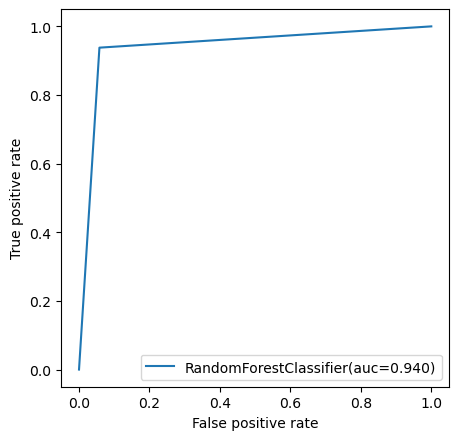

In [145]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,threshold=roc_curve(y_test,pred)
auc=auc(fpr,tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label='RandomForestClassifier(auc=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

# prediction

In [146]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred})

In [147]:
dfpred.sample(40)

,Expected,Predicted
207724,0,0
125326,0,0
139960,0,1
243219,0,1
225059,0,0
100052,1,1
119255,1,1
42554,1,0
249894,0,0
27989,1,1


# model saving

In [151]:
import pickle
filename="micro credit defaulter.pkl"
pickle.dump(rf,open(filename,'wb'))

# conclusion

from the model we got accuracy score and auc roc score of above 94%